In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Linear Regression Algorithm 

In [3]:
train_x = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

In [4]:
learning_rate = 0.01
epochs = 2000
display_steps = 50
n_sample = train_x.shape[0]

In [5]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

In [7]:
activation = tf.add(tf.multiply(X, W), b)
cost = tf.reduce_sum(tf.pow(activation-Y, 2)) / (2*n_sample)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

 Epoch:  50  Cost:  0.09513972  W:  0.32506093  b:  0.25855982
 Epoch:  100  Cost:  0.09303885  W:  0.32057258  b:  0.29084864
 Epoch:  150  Cost:  0.09118075  W:  0.31635112  b:  0.32121772
 Epoch:  200  Cost:  0.089537494  W:  0.3123808  b:  0.34978002
 Epoch:  250  Cost:  0.0880842  W:  0.30864653  b:  0.37664402
 Epoch:  300  Cost:  0.08679895  W:  0.3051342  b:  0.40191063
 Epoch:  350  Cost:  0.08566234  W:  0.30183107  b:  0.42567396
 Epoch:  400  Cost:  0.08465715  W:  0.2987243  b:  0.44802406
 Epoch:  450  Cost:  0.08376827  W:  0.29580215  b:  0.4690453
 Epoch:  500  Cost:  0.08298221  W:  0.29305395  b:  0.4888157
 Epoch:  550  Cost:  0.082287125  W:  0.2904693  b:  0.50740975
 Epoch:  600  Cost:  0.0816724  W:  0.28803807  b:  0.5248997
 Epoch:  650  Cost:  0.081128865  W:  0.28575164  b:  0.5413487
 Epoch:  700  Cost:  0.08064828  W:  0.28360102  b:  0.5568191
 Epoch:  750  Cost:  0.0802233  W:  0.28157842  b:  0.5713699
 Epoch:  800  Cost:  0.07984754  W:  0.2796759  b: 

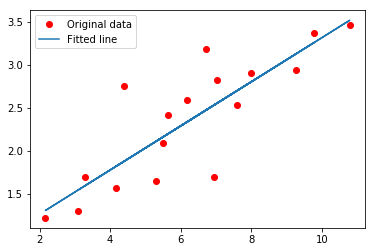

In [9]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    for epoch in range(epochs):
        for (x,y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
            
        if (epoch + 1) % display_steps == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print(" Epoch: ", epoch+1, " Cost: ", c," W: ", sess.run(W), " b: ", sess.run(b))
    print("Optimization Finished!")
    
    training_cost = sess.run(cost, feed_dict={X:train_x, Y:train_y})
    print(" Training Cost: ",training_cost, " W: ", sess.run(W), " b: ", sess.run(b))
    
    plt.plot(train_x, train_y, 'ro', label='Original data')
    plt.plot(train_x, sess.run(W)*train_x + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
    

## Multi-feature Linear Regression

In [10]:
def feature_normalize(features):
    for feature in features.T:
        fmean = np.mean(feature)
        frange = np.amax(feature) - np.amin(feature)
        feature -= fmean
        feature /= frange
    return features

#### Hyperparameter

In [11]:
learning_rate = 0.01
epochs = 1000
display_step = 50

#### Dataset { X: [200 x 3] , Y: [200 x 1] } i.e 3 features (column)

In [12]:
train_X = np.random.rand(200,3) * 10
train_Y = np.random.rand(200,1) * 100  
train_X = feature_normalize(train_X)

In [13]:
m, n = train_X.shape

X = tf.placeholder(tf.float32, [m, n])
Y = tf.placeholder(tf.float32, [m, 1])

W = tf.Variable(tf.zeros([n, 1], dtype=np.float32), name="weight")
b = tf.Variable(tf.zeros([1], dtype=np.float32), name="bias")

In [14]:
activation = tf.add(tf.matmul(X, W), b)
cost = tf.reduce_sum(tf.square(activation - Y)) / (2*m)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [16]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    for step in range(epochs):
        sess.run(optimizer, feed_dict={X: train_X, Y: train_Y})
        
        if step % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
            print ("Epoch:",step+1, "Cost: ",c, "W: ", sess.run(W), "b:", sess.run(b))

    print ("Training Done!")
    
    training_cost = sess.run(cost, feed_dict={X: np.asarray(train_X), Y: np.asarray(train_Y)})
    print("Training Cost: ", training_cost, "W: ", sess.run(W), "b: ", sess.run(b), '\n')

    predict_X = np.array([12, 13, 15], dtype=np.float32).reshape((1, 3))
    predict_X = predict_X / np.linalg.norm(predict_X)
    predict_Y = tf.add(tf.matmul(predict_X, W),b)
    print ("Predicted Output: ", sess.run(predict_Y))

Epoch: 1 Cost:  1560.8756 W:  [[-0.00556136]
 [ 0.0001474 ]
 [-0.0019021 ]] b: [0.4885331]
Epoch: 51 Cost:  819.2359 W:  [[-0.278271  ]
 [ 0.00732254]
 [-0.09552477]] b: [19.592329]
Epoch: 101 Cost:  547.6784 W:  [[-0.5407425 ]
 [ 0.01412615]
 [-0.18629584]] b: [31.15024]
Epoch: 151 Cost:  448.19287 W:  [[-0.79336286]
 [ 0.02057364]
 [-0.2742949 ]] b: [38.142845]
Epoch: 201 Cost:  411.69748 W:  [[-1.0365041 ]
 [ 0.02667991]
 [-0.3595998 ]] b: [42.37342]
Epoch: 251 Cost:  398.26437 W:  [[-1.2705249 ]
 [ 0.03245936]
 [-0.44228637]] b: [44.93295]
Epoch: 301 Cost:  393.27826 W:  [[-1.4957693 ]
 [ 0.03792589]
 [-0.52242893]] b: [46.48146]
Epoch: 351 Cost:  391.38885 W:  [[-1.7125683 ]
 [ 0.04309289]
 [-0.60009986]] b: [47.418335]
Epoch: 401 Cost:  390.63773 W:  [[-1.9212404 ]
 [ 0.04797332]
 [-0.6753699 ]] b: [47.985146]
Epoch: 451 Cost:  390.30746 W:  [[-2.1220932 ]
 [ 0.05257965]
 [-0.7483075 ]] b: [48.328056]
Epoch: 501 Cost:  390.13525 W:  [[-2.315421  ]
 [ 0.05692393]
 [-0.8189804 ]] b